# Unsupervised Learning

The bulk of this course has been about data problems where we have a set of samples with some predictor features and a result. The goal has been to develop models that will use the values of the features to make a prediction about the result. However in many cases what we have is a set of samples and values for some of their features but with nothing else. This is an example of what we would call an unsupervised learning problem. The goal is to develop algorithms that will help us make sense out of datasets like this. 

In the best cases these algorithms will lead to hypothesis from the data about. 

We have already seen one example of an unsupervised learning algorithm in the form of a pre-processing algorithm:  *Principal Component Analysis* looks at a set of features and tries to choose a linear combination of them that does the best job at predicting the variations from sample to sample. If you look back at how we implemented it you will see that it only depended on the predictors and did not use the result values.

Today we will look at a type of unsupervised learning algorithm called *Clustering* however it is worth noting that there are other approaches to unsupervised learning particularly to developing visualizations for exploring data (see *STAT 202*) that we will not be discussing in this class. This area of machine learning is definitly one in which research is ongoing and in the next few years there will be many PhD thesis written about unsupervised learning problems.

## Clustering

The goal of clustering algorithms is to separate the samples into groups or clusters by the values of their features. A classic use case of this in studying the genomic variety of a species. For example in tracing the process by which an agricultural plant (such as *Cannabis Sativa* or *Humulus Lupulus*) has been domesticated one might collect the proportions of various codes included in their DNA for samples of the plants from a wide geographic region and then ask if there are identifiable subgroups within the species.

Another classic use of clustering is by companies in developing targeted marketing. Data is collected from existing customers, machine learning applied to see if indentifiable subgroups of customers can be found and then the motivations behind those types of customers explored to develop marketing strategies for them. Our university is doing this as we speak.

To some extent clustering is still where there is some human needed in deciding if the algorithm returned a useful result or not.

### K-Means

Our first clustering algorithm is called K-Means. The algorithm will take k, the number of clusters, as a parameter, and then will find the best division of the data into k clusters. 

First we need to define the *centroid* of a subset of our samples to be the coordinates in the feature space given by the means of each of the features over the subset. 

**The K-Means Algorithm**

1. Starting from a random assignment of each of the samples into on of the k clusters.

2. Proceeding with the following steps until the assignment into Clusters stops changing:
    a. Compute the *centroid* of each cluster form the current assignments.
    b. Reassign the smaples to the clusters by setting it to match the closest centroid.
    
Note right away that because we are using *distance* in the algorithm the method will produce different results depending on whether we have normalized our data first or not.





In [1]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import matplotlib.cm as cm
import matplotlib.colors as pltco

Today we will circle back around to the Colorado Childcare dataset. This dataset contains the geographic location of licensed childcare facilities in Colorado, and we suspect from our earlier analysis that there are clusters within the data. It is a bit problematic and we will see that the K-Means Algorithm misses some of the features.

In [2]:
df = pa.read_csv('Data Sets/Colorado_Licensed_Child_Care_Facilities_Report.csv')
df.head()

,PROVIDER ID,PROVIDER NAME,PROVIDER SERVICE TYPE,STREET ADDRESS,CITY,STATE,ZIP,COUNTY,COMMUNITY,ECC,...,CCCAP CASE COUNT_D1,CCCAP FA EXP DATE_D1,CCCAP TOTAL AUTH_D1,CCCAP FA STATUS_D1,CCCAP AMOUNT PAID_D1,CCCAP FA EXP DATE_D2,CCCAP TOTAL AUTH_D2,CCCAP FA STATUS_D2,LICENSE FEE DISCOUNT,LONG-LAT
0,48,VIKKI MCKEOGH,Experienced Family Child Care Home,6635 E Monaco DR,Brighton,CO,80602,Adams,West Adams,Early Childhood Partnership of Adams County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"(39.919258, -104.911005)"
1,65,JACKIE GRAY,Family Child Care Home,4388 118 Ave.,Thornton,CO,80233,Adams,West Adams,Early Childhood Partnership of Adams County,...,3.0,06/30/2019,3.0,1.0,239.20,06/14/2019,3.0,1.0,0.0,"(39.9101, -104.9344)"
2,100,CHEROKEE TRAIL ELEMENTARY KIDS CENTER,School-Age Child Care Center,17302 Clarke Farms DR,Parker,CO,80134,Douglas,Parker,Douglas County Early Childhood Council,...,3.0,06/30/2019,5.0,1.0,974.61,05/31/2020,5.0,1.0,0.0,"(39.525183, -104.786646)"
3,115,EARLY CHILDHOOD EDUCATION,Preschool Program,1023 N 31st ST,Colorado Springs,CO,80904,El Paso,Colorado Springs,Alliance for Kids,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"(38.86547, -104.867475)"
4,157,CHERLLYNN SAUNDERS,Infant/Toddler Home,5989 W Fair DR,Littleton,CO,80123,Jefferson,Northeast Jefferson,Triad Early Childhood Council,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"(39.604151, -105.063248)"


In [3]:
temp = df.loc[:, ['PROVIDER SERVICE TYPE', 'LONG-LAT'] ]

# pull up the longitude and lattitude coordinates
 
lon = [eval(temp.loc[c, 'LONG-LAT'])[0] for c in temp.index.values]
lat = [eval(temp.loc[c, 'LONG-LAT'])[1] for c in temp.index.values]
    
# Separate the longitude and lattide coordinates
# Some notes on the Python here:  the coordinates have been read in as a string, we can convert them to a 
# tuple with eval and then reference each with a position index.

locate = pa.DataFrame(np.array( [lat, lon]).transpose(), columns = ['Lat', 'Long'])

In [4]:
X = np.array(locate)

As described above, we expect better results after a normalization, be warry though as the types could be integer rather than float. In this case I check that they have been read as floats.

In [5]:
X.dtype

dtype('float64')

In [6]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - X[:, l].min())/(X[:, l].max() - X[:, l].min())

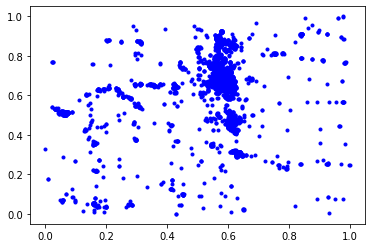

In [7]:
plt.plot(X[:, 0], X[:, 1], 'b.');
plt.savefig('17.1.png')

We will do the K-Means Clustering by hand here and then introduce the scikit learn package implementing it.

Let's see if we can identify two clusters in this data. We start by randomly assigning each point to one of the two groups.

In [8]:
y = np.array(rnd.randint(2, size=X.shape[0]))

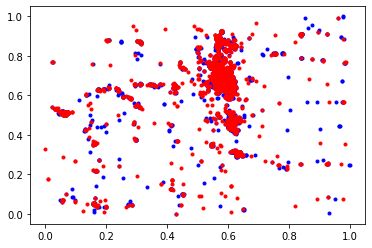

In [9]:
plt.plot(X[y==0, 0], X[y==0, 1], 'b.')
plt.plot(X[y==1, 0], X[y==1, 1], 'r.')
plt.savefig('17.2.png')

For each group we compute the centroid by finding the mean of the values along each axis.

In [10]:
def ret_centroids(X, y):
    
    return np.array([[X[y==0, 0].mean(), X[y==0, 1].mean()], [X[y==1, 0].mean(), X[y==1, 1].mean()]])

In [11]:
c = ret_centroids(X, y)
c

array([[0.54840172, 0.63470342],
       [0.54462971, 0.63159221]])

In [12]:
def plot_cluster(X, y, c):

    plt.figure(figsize=(10, 8))
    plt.plot(X[y==0, 0], X[y==0, 1], 'b.')
    plt.plot(X[y==1, 0], X[y==1, 1], 'r.')
    plt.plot(c[0, 0], c[0, 1], 'b*')
    plt.plot(c[1, 0], c[1, 1], 'r*')
    
    return None

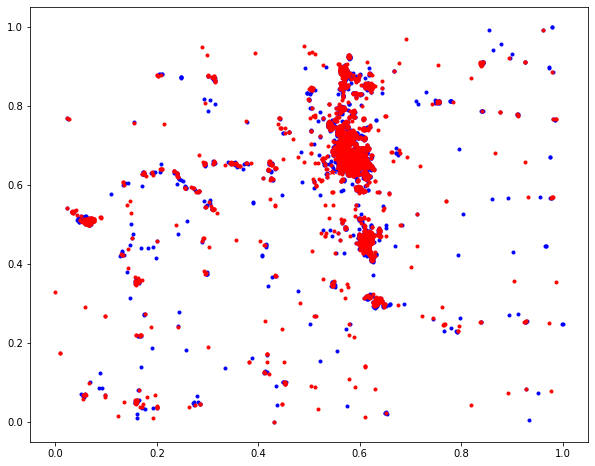

In [13]:
plot_cluster(X, y, c)
plt.savefig('17.3.png')

They are there (very close to each other).

Now we reassign the values of each point based on the centroid they are closest to.



In [14]:
def assign_cluster(X, y, c):
    
    for k in range(X.shape[0]):
        d0 = np.sqrt( (X[k, 0] - c[0, 0])**2 + (X[k, 1] - c[0, 1])**2)
        d1 = np.sqrt( (X[k, 0] - c[1, 0])**2 + (X[k, 1] - c[1, 1])**2)
        
        if d0 <= d1:
            y[k] = 0
        else:
            y[k] = 1
            
    return y

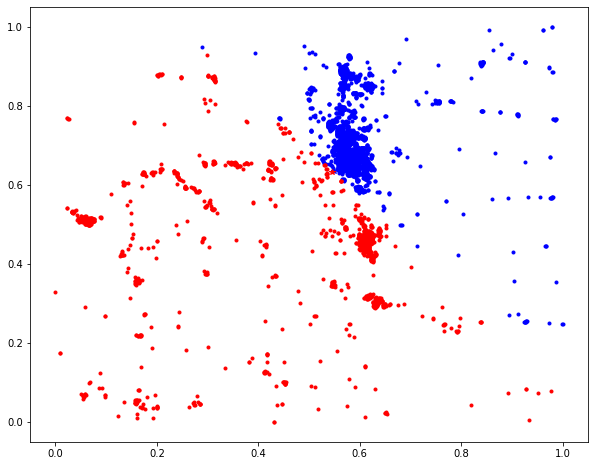

In [15]:
y = assign_cluster(X, y, c)
plot_cluster(X, y, c)
plt.savefig('17.4.png')

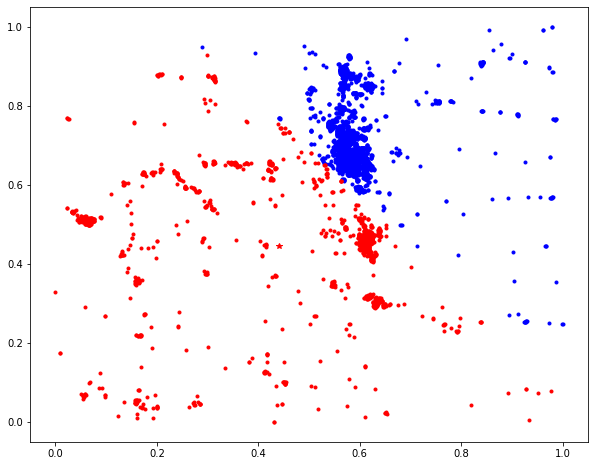

In [16]:
c = ret_centroids(X, y)
plot_cluster(X, y, c)
plt.savefig('17.5.png')

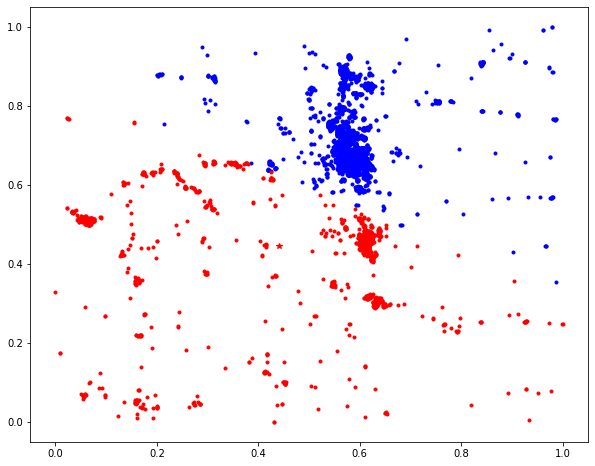

In [17]:
y = assign_cluster(X, y, c)
plot_cluster(X, y, c)
plt.savefig('17.6.png')

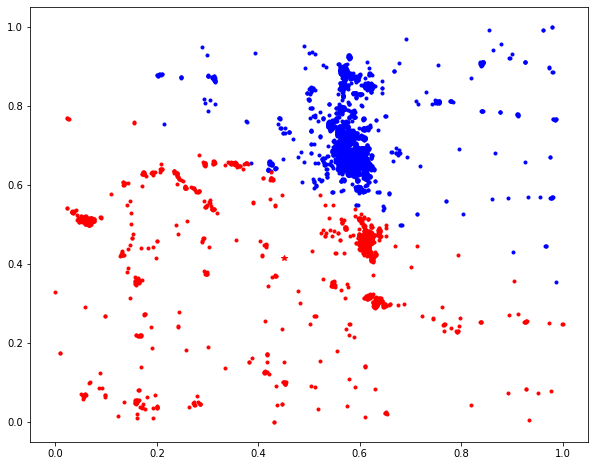

In [18]:
c = ret_centroids(X, y)
plot_cluster(X, y, c)
plt.savefig('17.7.png')

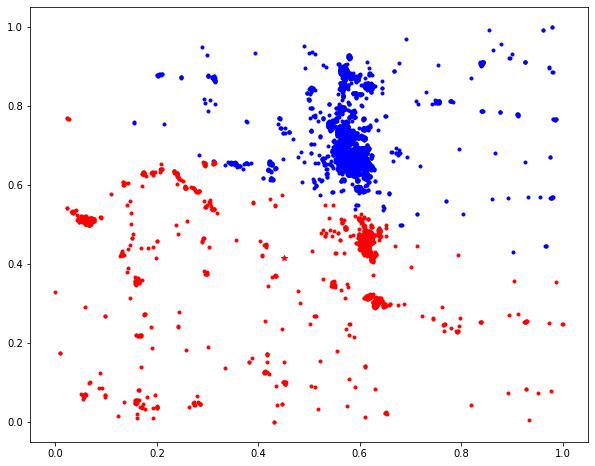

In [19]:
y = assign_cluster(X, y, c)
plot_cluster(X, y, c)
plt.savefig('17.8.png')

In practice K-means is minimizing the within-cluster sum-of-squares criterion that is the sum of the distances between the samples of a cluster and its centroid. This measurement does have some drawbacks, it will favor clusters that are convex, and it will miss clusters that are elongated or have irregular shapes.

Evaluating the performance of a clustering model is not as straightforward as computing the percentage of correct classifications that we do in supervised learning. In this case we do not know what the true classification is for our sample.

The main parameter in the algorithm is $K$, the number of clusters. 

In [20]:
def cluster_plot(cluster, X):
       
    n_clusters = cluster.get_params()['n_clusters']
    cmap_bold = pltco.ListedColormap([cm.hot(k/n_clusters) for k in range(n_clusters) ])  
    # We need a color map that expands to match the number of clusters

    plt.scatter(X[:, 0], X[:, 1], c=cluster.fit_predict(X), cmap=cmap_bold,marker='o')

In [21]:
from sklearn.cluster import KMeans

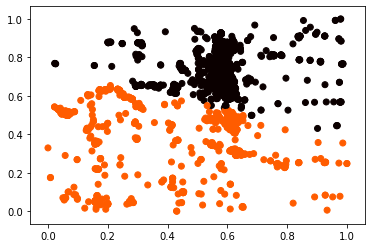

In [22]:
cluster = KMeans(n_clusters=2)
cluster_plot(cluster, X)
plt.savefig('17.9.png')

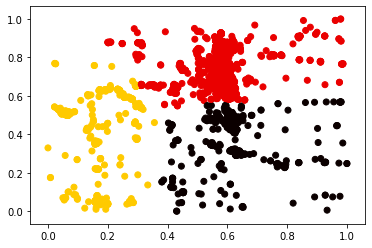

In [23]:
cluster = KMeans(n_clusters=3)
cluster_plot(cluster, X)
plt.savefig('17.10.png')

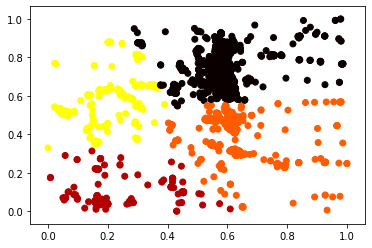

In [24]:
cluster = KMeans(n_clusters=4)
cluster_plot(cluster, X)
plt.savefig('17.11.png')

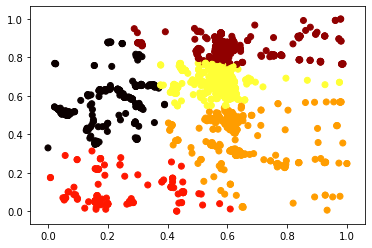

In [25]:
cluster = KMeans(n_clusters=5)
cluster_plot(cluster, X)
plt.savefig('17.12.png')

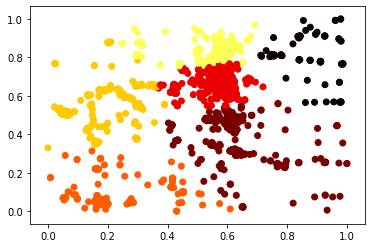

In [26]:
cluster = KMeans(n_clusters=6)
cluster_plot(cluster, X)
plt.savefig('17.13.png')

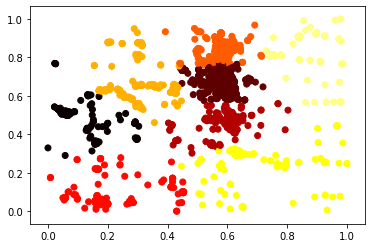

In [27]:
cluster = KMeans(n_clusters=8)
cluster_plot(cluster, X)
plt.savefig('17.14.png')

The algorithm has produced a rather unsurprising clustering of the states childcare facilities that more or less corresponds to the major geographic and demographic regions. Note that we have not taken into account any of the other features in the data.

Clustering is a tool for teasing out meaning in the data or identifying hypothesis that deserve exploring.

## Hierarchical Clustering

*Hierarchical Clustering* are algorithms that decide on clusters among the data by looking at merging or splitting cluster divisions. The are different from the distance based clustering algorithms used above and support some generalizations that are capable of picking out clusters with odd geometric structure.

These clusters are also capable of identifing groupsings that have uneven cluster sizes.

The objective function we will be minimizing is the *linkage distance* this is one of the parameters for the algorithm that can be varied it can be set to the 'single', 'average', 'complete', or 'Ward'. Furthermore the actual distance function underlying the linkage distance can be varried as well. The linkage distance used will affect the types of clusters that will be identified. See scikit-learn for a complete overview.

The algorithm we will examine today, *Agglomerative Clustering*, is a bottom up approach. It will start with each data point from the sample in its own cluster and then proceed to merge pairs of clusters that will give a minimal increase in the *linkage distance*.

In [28]:
from sklearn.cluster import AgglomerativeClustering

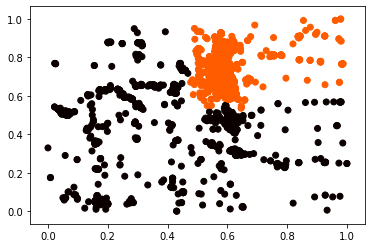

In [29]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_plot(cluster, X)
plt.savefig('17.15.png')

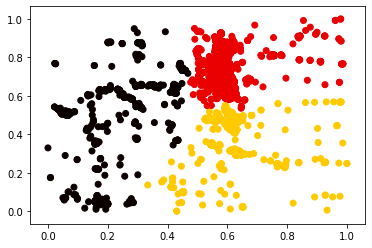

In [30]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_plot(cluster, X)
plt.savefig('17.16.png')

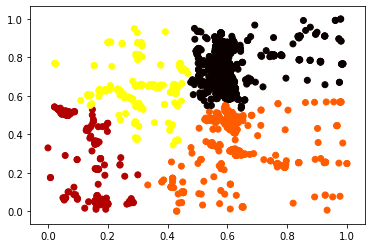

In [31]:
cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_plot(cluster, X)
plt.savefig('17.17.png')

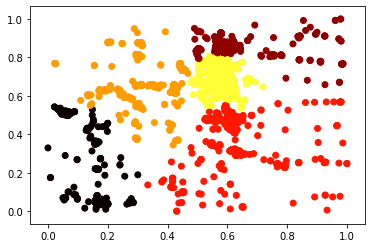

In [32]:
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_plot(cluster, X)
plt.savefig('17.18.png')

Changing the linkage used adjusts the shapes and types of clusters that are identified.

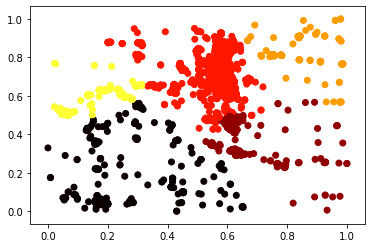

In [33]:
cluster = AgglomerativeClustering(n_clusters=5, linkage='complete')
cluster_plot(cluster, X)
plt.savefig('17.19.png')

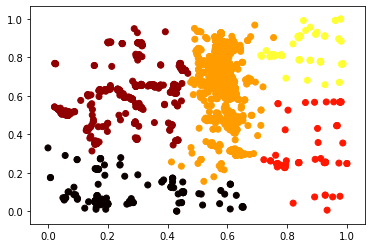

In [34]:
cluster = AgglomerativeClustering(n_clusters=5, linkage='average')
cluster_plot(cluster, X)
plt.savefig('17.20.png')

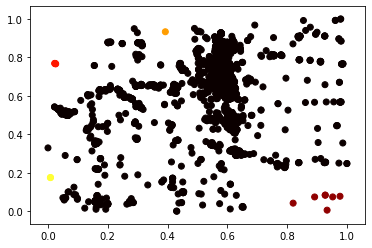

In [35]:
cluster = AgglomerativeClustering(n_clusters=5, linkage='single')
cluster_plot(cluster, X)
plt.savefig('17.21.png')

This last example illustrates another use of clustering. It can identify samples that are significantly separated in the feature space from the rest of the data set.

### Birch Algorithm

The *Birch* algorithm builds a tree called the Characteristic Feature Tree for the data. The data is compressed into the feature tree and the algorithm stores the necessary information without keeping the entire data set used. Each node of the tree includes information about the number of samples it represents and their relatives distances and location in the feature space. There are two parameters in the algorithm a *threshhold* and a *branching factor*. One use of Birch is to reduce the size of the dataset being used as that is its primary approach in identifying samples that are closely related. It can be passed the number of clusters or it can produce as a result the number of clusters.

In [36]:
from sklearn.cluster import Birch

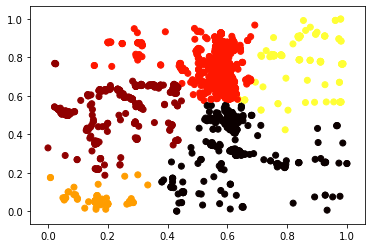

In [37]:
cluster = Birch(threshold = 0.10, n_clusters=5)
cluster_plot(cluster, X)
plt.savefig('17.22.png')

In [38]:
cluster = Birch(threshold = 0.10, n_clusters=None)
cluster.fit(X)
labels = set(cluster.labels_)
labels

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

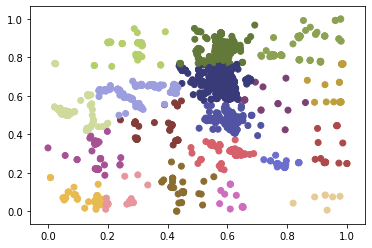

In [39]:
n_clusters = len(labels)
cmap_bold = pltco.ListedColormap([cm.tab20b(k/n_clusters) for k in range(n_clusters) ])  
# We need a color map that expands to match the number of clusters

plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_, cmap=cmap_bold,marker='o');
plt.savefig('17.33.png')

## Clustering as Feature Selection

An important supervised learning use is in feature selection. Using a clustering algorithm we can identify features that are related to each other, select representatives of each cluster and then use those to develop models. 

This change in point of view means rather than thinking of the samples as rows and the features as columns, we transpose the problem and think of the features as the rows and samples as the columns. The clustering algorithms above will then identify features whose sample values are closely related. 

As an example lets look at a data set I have talked about a few times in this class:  The performance of students in Calculus 1.

In [40]:
math131 = pa.read_csv('Data Sets/math 131 data.csv')
math131.head()

,Gender,Classification,First_Gen,Pell,ALEKS,ACT_Math,ACT_Verbal,ACT_Composite,Grade,Grade_Replacement,...,Population_Gifted/Dual Enrollment,Population_Second BA (1st BA at UNC),Population_Graduate,Population_Other High School concurrent,Population_Continuing,Population_Second BA (1st BA Transfer),Population_Undergrad-non degree seeking,Population_Eng Lang Prog,Population_New First Time,Population_Exchange (International)
0,1,1,1,0,46.0,23.0,24.0,26.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,0,64.0,31.0,26.0,28.0,4,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,81.0,22.0,24.0,22.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,86.0,28.0,32.0,31.0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,73.0,25.0,22.0,27.0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
X = np.array(math131).transpose()
X.shape

(38, 593)

In [42]:
for l in range(X.shape[0]):
    if X[l, :].max() != X[l, :].min():
        X[l, :] = ( X[l, :] - X[l, :].min())/(X[l, :].max() - X[l, :].min())

In [43]:
from sklearn.cluster import KMeans

In [44]:
cluster = KMeans(n_clusters=2)
predict = cluster.fit_predict(X)
result = [ (predict[k], math131.columns[k]) for k in range(math131.shape[1]) ]
result

[(1, 'Gender'),
 (0, 'Classification'),
 (1, 'First_Gen'),
 (1, 'Pell'),
 (1, 'ALEKS'),
 (1, 'ACT_Math'),
 (1, 'ACT_Verbal'),
 (1, 'ACT_Composite'),
 (1, 'Grade'),
 (0, 'Grade_Replacement'),
 (0, 'Grade_130'),
 (1, 'HS_Percentile'),
 (1, 'HS_GPA'),
 (0, 'Transfere_Attempted'),
 (0, 'Transfer_GPA'),
 (0, 'Transfer_Awarded'),
 (0, 'Transfer_Awarded_GPA'),
 (0, 'Race_Hispanic or Latino'),
 (0, 'Race_Native Hawaiian or Other Pacific Islander'),
 (1, 'Race_White'),
 (0, 'Race_Asian'),
 (0, 'Race_Non-Resident Alien'),
 (0, 'Race_Black or African American'),
 (0, 'Race_Multiracial'),
 (0, 'Race_Unknown'),
 (0, 'Race_American Indian or Alaska Native'),
 (0, 'Population_High School Concurrent'),
 (0, 'Population_Transfer'),
 (0, 'Population_Gifted/Dual Enrollment'),
 (0, 'Population_Second BA (1st BA at UNC)'),
 (0, 'Population_Graduate'),
 (0, 'Population_Other High School concurrent'),
 (1, 'Population_Continuing'),
 (0, 'Population_Second BA (1st BA Transfer)'),
 (0, 'Population_Undergrad-no

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
predict = cluster.fit_predict(X)
result = [ (predict[k], math131.columns[k]) for k in range(math131.shape[1]) ]
result

[(1, 'Gender'),
 (2, 'Classification'),
 (0, 'First_Gen'),
 (0, 'Pell'),
 (1, 'ALEKS'),
 (1, 'ACT_Math'),
 (1, 'ACT_Verbal'),
 (1, 'ACT_Composite'),
 (1, 'Grade'),
 (0, 'Grade_Replacement'),
 (0, 'Grade_130'),
 (1, 'HS_Percentile'),
 (1, 'HS_GPA'),
 (2, 'Transfere_Attempted'),
 (3, 'Transfer_GPA'),
 (2, 'Transfer_Awarded'),
 (3, 'Transfer_Awarded_GPA'),
 (0, 'Race_Hispanic or Latino'),
 (2, 'Race_Native Hawaiian or Other Pacific Islander'),
 (1, 'Race_White'),
 (2, 'Race_Asian'),
 (2, 'Race_Non-Resident Alien'),
 (2, 'Race_Black or African American'),
 (2, 'Race_Multiracial'),
 (2, 'Race_Unknown'),
 (2, 'Race_American Indian or Alaska Native'),
 (2, 'Population_High School Concurrent'),
 (2, 'Population_Transfer'),
 (2, 'Population_Gifted/Dual Enrollment'),
 (2, 'Population_Second BA (1st BA at UNC)'),
 (2, 'Population_Graduate'),
 (2, 'Population_Other High School concurrent'),
 (4, 'Population_Continuing'),
 (2, 'Population_Second BA (1st BA Transfer)'),
 (2, 'Population_Undergrad-no

In [47]:
from sklearn.cluster import Birch

In [48]:
cluster = Birch(threshold = 0.15, n_clusters = None)
predict = cluster.fit_predict(X)
result = [ (predict[k], math131.columns[k]) for k in range(math131.shape[1]) ]
result

[(0, 'Gender'),
 (1, 'Classification'),
 (2, 'First_Gen'),
 (3, 'Pell'),
 (4, 'ALEKS'),
 (5, 'ACT_Math'),
 (6, 'ACT_Verbal'),
 (7, 'ACT_Composite'),
 (8, 'Grade'),
 (9, 'Grade_Replacement'),
 (10, 'Grade_130'),
 (11, 'HS_Percentile'),
 (12, 'HS_GPA'),
 (13, 'Transfere_Attempted'),
 (14, 'Transfer_GPA'),
 (15, 'Transfer_Awarded'),
 (16, 'Transfer_Awarded_GPA'),
 (17, 'Race_Hispanic or Latino'),
 (18, 'Race_Native Hawaiian or Other Pacific Islander'),
 (19, 'Race_White'),
 (20, 'Race_Asian'),
 (18, 'Race_Non-Resident Alien'),
 (21, 'Race_Black or African American'),
 (22, 'Race_Multiracial'),
 (23, 'Race_Unknown'),
 (24, 'Race_American Indian or Alaska Native'),
 (25, 'Population_High School Concurrent'),
 (26, 'Population_Transfer'),
 (27, 'Population_Gifted/Dual Enrollment'),
 (18, 'Population_Second BA (1st BA at UNC)'),
 (18, 'Population_Graduate'),
 (28, 'Population_Other High School concurrent'),
 (29, 'Population_Continuing'),
 (18, 'Population_Second BA (1st BA Transfer)'),
 (30,